In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans

print(pd.__version__)
data = pd.read_csv('happyscore_income.csv')

0.24.1


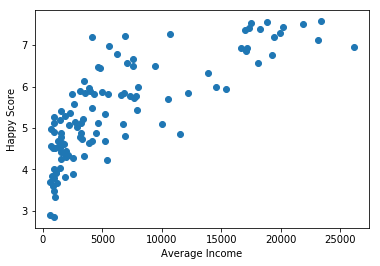

In [2]:
income = data['avg_income']
happy = data.happyScore

plt.scatter(income, happy)
plt.xlabel('Average Income')
plt.ylabel('Happy Score')
plt.show()

In [5]:
income_happy = np.column_stack((income, happy))

km_res = KMeans(n_clusters=3).fit(income_happy) # n_clusters is the num of clusters we want

clusters = km_res.cluster_centers_ # center point of the clusers
clusters # print clusters

array([[7.57755711e+03, 5.85080769e+00],
       [1.87593022e+04, 7.03270000e+00],
       [2.19912121e+03, 4.75472308e+00]])

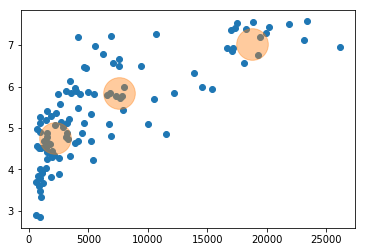

In [6]:
plt.scatter(income, happy)
plt.scatter(clusters[:,0], clusters[:,1], s=1000, alpha=0.40)
plt.show()

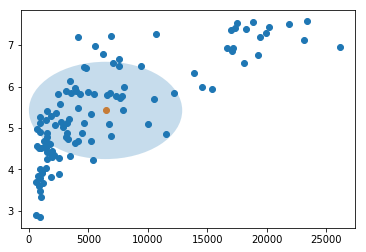

In [7]:
inc_mean = np.mean(income_happy, 0)
inc_std = np.std(income_happy, 0)

ellipse = patches.Ellipse([inc_mean[0], inc_mean[1]], inc_std[0]*2, inc_std[1]*2, alpha=0.25) # alpha is for transparancy

fig,graph = plt.subplots()

graph.scatter(income, happy)
graph.scatter(inc_mean[0], inc_mean[1])
graph.add_patch(ellipse)